Most of the theory and implementation is taken from : https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/




## Theory


1) **Content based filtering**

This algorithm recommends products which are similar to the ones that a user has liked in the past. For example, if a person has liked the movie “Inception”, then this algorithm will recommend movies that fall under the same genre.

Consider the example of Netflix. They save all the information related to each user in a vector form. This vector contains the past behavior of the user, i.e. the movies liked/disliked by the user and the ratings given by them. This vector is known as the **profile vector**. All the information related to movies is stored in another vector called the **item vector**. Item vector contains the details of each movie, like genre, cast, director, etc.

The content-based filtering algorithm finds the cosine of the angle between the profile vector and item vector, i.e. **cosine similarity.** 
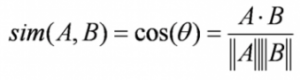

Based on the cosine value, which ranges between -1 to 1, the movies are arranged in descending order and one of the two below approaches is used for recommendations:

- **Top-n approach**: where the top n movies are recommended (Here n can be decided by the business)

- **Rating scale approach**: Where a threshold is set and all the movies above that threshold are recommended

Similarity can also be computed differently:


- **Euclidean Distance**: Similar items will lie in close proximity to each other if plotted in n-dimensional space. So, we can calculate the distance between items and based on that distance, recommend items to the user. The formula for the euclidean distance is given by:

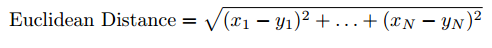

- **Pearson’s Correlation**: It tells us how much two items are correlated. Higher the correlation, more will be the similarity. Pearson’s correlation can be calculated using the following formula:

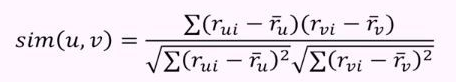

**A major drawback of this algorithm is that it is limited to recommending items that are of the same type**. It will never recommend products which the user has not bought or liked in the past. So if a user has watched or liked only action movies in the past, the system will recommend only action movies. It’s a very narrow way of building an engine.

To improve on this type of system, we need an algorithm that can recommend items not just based on the content, but the behavior of users as well.

2) **Collaborative filtering**

Let us understand this with an example. If person A likes 3 movies, say `Interstellar`, `Inception` and `Predestination`, and person B likes `Inception`, `Predestination` and `The Prestige`, then they have almost similar interests. We can say with some certainty that A should like `The Prestige` and B should like `Interstellar`. The collaborative filtering algorithm uses **“User Behavior”** for recommending items. This is one of the most commonly used algorithms in the industry as it is not dependent on any additional information. There are different types of collaborating filtering techniques:

**User-User collaborative filtering**

This algorithm first finds the similarity score between users. Based on this similarity score, it then picks out the most similar users and recommends products which these similar users have liked or bought previously. In terms of our movies example from earlier, this algorithm finds the similarity between each user based on the ratings they have previously given to different movies. The prediction of an item for a user 'u'  is calculated by computing the weighted sum of the user ratings given by other users to an item 'i'. The prediction $ P_{u,i} $ is given by:


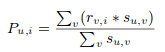

Here,

- $P_{u,i}$ is the prediction of an item
- $R_{v,i}$ is the rating given by a user v to a movie i
- $S_{u,v}$ is the similarity between users

Now, we have the ratings for users in profile vector and based on that we have to predict the ratings for other users. Following steps are followed to do so:

- For predictions we need the similarity between the user 'u' and 'v'. We can make use of Pearson correlation.

- First we find the items rated by both the users and based on the ratings, correlation between the users is calculated.

- The predictions can be calculated using the similarity values. This algorithm, first of all calculates the similarity between each user and then based on each similarity calculates the predictions. **Users having higher correlation will tend to be similar.**

- Based on these prediction values, recommendations are made.


This algorithm is quite time consuming as it involves calculating the similarity for each pair of users and then calculating prediction for each similarity score. One way of handling this problem is to select only a few users (neighbors) instead of all to make predictions, i.e. instead of making predictions for all similarity values, we choose only few similarity values. There are various ways to select the neighbors:

- Select a threshold similarity and choose all the users above that value

- Randomly select the users

- Arrange the neighbors in descending order of their similarity value and choose top-N users

- Use clustering for choosing neighbors


This algorithm is useful when the number of users is less. Its not effective when there are a large number of users as it will take a lot of time to compute the similarity between all user pairs. This leads us to **item-item** collaborative filtering, which is effective when *the number of users is more than the items being recommended.*


Quite good explanation of Item-based Collaborative filtering and the difference to the content-based filtering: https://stackoverflow.com/questions/16372191/whats-difference-between-item-based-and-content-based-collaborative-filtering



**Item-Item collaborative filtering**

The original Item-based recommendation is totally based on **user-item** ranking (e.g., a user rated a movie with 3 stars, or a user "likes" a video). When you compute the similarity between items, you are not supposed to know anything other than all users' history of ratings. So the similarity between items is computed based on the ratings instead of the meta data of item content.



So in our case we will find the similarity between each movie pair and based on that, we will recommend similar movies which are liked by the users in the past. This algorithm works similar to user-user collaborative filtering with just a little change – instead of taking the weighted sum of ratings of “user-neighbors”, we take the weighted sum of ratings of “item-neighbors”. The prediction is given by:


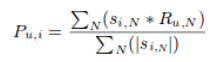

Now we will find the similarity between items.

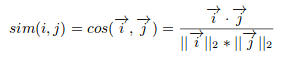


Now, as we have the similarity between each movie and the ratings, predictions are made and based on those predictions, similar movies are recommended.

**Cold Start**

Before going further and implementing these concepts, there is a question which we must know the answer to – what will happen if a new user or a new item is added in the dataset? It is called a **Cold Start**. There can be two types of cold start:

- *Visitor Cold Start*
- *Product Cold Start*

Visitor Cold Start means that a new user is introduced in the dataset. Since there is no history of that user, the system does not know the preferences of that user. It becomes harder to recommend products to that user. So, how can we solve this problem? One basic approach could be to apply a popularity based strategy, i.e. recommend the most popular products. These can be determined by what has been popular recently overall or regionally. Once we know the preferences of the user, recommending products will be easier.

On the other hand, Product Cold Start means that a new product is launched in the market or added to the system. User action is most important to determine the value of any product. More the interaction a product receives, the easier it is for our model to recommend that product to the right user. We can make use of Content based filtering to solve this problem. The system first uses the content of the new product for recommendations and then eventually the user actions on that product.

Now let’s solidify our understanding of these concepts using a case study in Python. Get your machines ready because this is going to be fun!

Stable benchmark dataset. 100,000 ratings from 1000 users on 1700 movies. Released 4/1998.

Data: https://grouplens.org/datasets/movielens/100k/

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Reading users file:

user_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../Recommendation_Engine/data/u.user', sep='|', names=user_cols,encoding='latin-1')
print(users.shape)
users.head(5)

(943, 5)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


So, we have 943 users in the dataset and each user has 5 features, i.e. user_ID, age, sex, occupation and zip_code. Now let’s look at the ratings file.

In [3]:
#Reading ratings file:

rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('../Recommendation_Engine/data/u.data', sep='\t', names=rating_cols,encoding='latin-1')
print(ratings.shape)
ratings.head(5)

(100000, 4)


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


We have 100k ratings for different user and movie combinations. Now finally examine the items file.

In [4]:
#Reading items file:

item_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('../Recommendation_Engine/data/u.item', sep='|', names=item_cols,
encoding='latin-1')
print(items.shape)
items.head(5)

(1682, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


This dataset contains attributes of 1682 movies. There are 24 columns out of which last 19 columns specify the genre of a particular movie. These are binary columns, i.e., a value of 1 denotes that the movie belongs to that genre, and 0 otherwise.

The dataset has already been divided into train and test by GroupLens where the test data has 10 ratings for each user, i.e. 9,430 rows in total. We will read both these files into our Python environment.

In [5]:
#Ratings file (u.data) is already splitted into train/test


ratings_train = pd.read_csv('../Recommendation_Engine/data/ua.base', sep='\t', names=rating_cols, encoding='latin-1')
ratings_test = pd.read_csv('../Recommendation_Engine/data/ua.test', sep='\t', names=rating_cols, encoding='latin-1')
ratings_train.shape, ratings_test.shape

((90570, 4), (9430, 4))

In [6]:
ratings_train.head(5)

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


### Building collaborative filtering model from scratch

We will recommend movies based on user-user similarity and item-item similarity. For that, first we need to calculate the number of unique users and movies.

In [7]:
n_users = ratings.user_id.unique().shape[0]
print(n_users)
n_items = ratings.movie_id.unique().shape[0]
print(n_items)

943
1682


Now, we need create a user-item matrix which can be used to calculate the similarity between users and items.

In [8]:
ratings.head(5)

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
data_matrix = np.zeros((n_users, n_items))


for line in ratings.itertuples():
    #print(line[3])
    data_matrix[line[1]-1, line[2]-1] = line[3]
    
print(data_matrix)

[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


The one can observe zero entries in **data_matrix**, our goal is to predict rating for these positions.

Now, we will calculate the similarity. We can use the pairwise_distance function from sklearn to calculate the cosine similarity.

In [10]:
from sklearn.metrics.pairwise import pairwise_distances

user_similarity = pairwise_distances(data_matrix, metric='cosine')
item_similarity = pairwise_distances(data_matrix.T, metric='cosine')

In [11]:
user_similarity

array([[0.        , 0.83306902, 0.95254046, ..., 0.85138306, 0.82049212,
        0.60182526],
       [0.83306902, 0.        , 0.88940868, ..., 0.83851522, 0.82773219,
        0.89420212],
       [0.95254046, 0.88940868, 0.        , ..., 0.89875744, 0.86658385,
        0.97344413],
       ...,
       [0.85138306, 0.83851522, 0.89875744, ..., 0.        , 0.8983582 ,
        0.90488042],
       [0.82049212, 0.82773219, 0.86658385, ..., 0.8983582 , 0.        ,
        0.81753534],
       [0.60182526, 0.89420212, 0.97344413, ..., 0.90488042, 0.81753534,
        0.        ]])

In [12]:
item_similarity

array([[0.        , 0.59761782, 0.66975521, ..., 1.        , 0.95281693,
        0.95281693],
       [0.59761782, 0.        , 0.72693082, ..., 1.        , 0.92170064,
        0.92170064],
       [0.66975521, 0.72693082, 0.        , ..., 1.        , 1.        ,
        0.90312495],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.95281693, 0.92170064, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.95281693, 0.92170064, 0.90312495, ..., 1.        , 1.        ,
        0.        ]])

This gives us the item-item and user-user similarity in an array form. The next step is to make predictions based on these similarities. Let’s define a function to do just that.

In [13]:
def prediction(ratings, similarity, type = 'user'):
    if type == 'user':
        
        mean_user_rating = ratings.mean(axis=1) # Compute row-wise mean (average ratings)
        
        #We use np.newaxis so that mean_user_rating has same format as ratings
        #Simply put, the newaxis is used to increase the dimension of the existing 
        #array by one more dimension, when used once.
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T 
    
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    
    return pred


Finally, we will make predictions based on user similarity and item similarity.

In [14]:
user_prediction = prediction(data_matrix, user_similarity, type='user')
print(user_prediction)
item_prediction = prediction(data_matrix, item_similarity, type='item')
print(item_prediction)

[[ 2.06532606  0.73430275  0.62992381 ...  0.39359041  0.39304874
   0.3927712 ]
 [ 1.76308836  0.38404019  0.19617889 ... -0.08837789 -0.0869183
  -0.08671183]
 [ 1.79590398  0.32904733  0.15882885 ... -0.13699223 -0.13496852
  -0.13476488]
 ...
 [ 1.59151513  0.27526889  0.10219534 ... -0.16735162 -0.16657451
  -0.16641377]
 [ 1.81036267  0.40479877  0.27545013 ... -0.00907358 -0.00846587
  -0.00804858]
 [ 1.8384313   0.47964837  0.38496292 ...  0.14686675  0.14629808
   0.14641455]]
[[0.44627765 0.475473   0.50593755 ... 0.58815455 0.5731069  0.56669645]
 [0.10854432 0.13295661 0.12558851 ... 0.13445801 0.13657587 0.13711081]
 [0.08568497 0.09169006 0.08764343 ... 0.08465892 0.08976784 0.09084451]
 ...
 [0.03230047 0.0450241  0.04292449 ... 0.05302764 0.0519099  0.05228033]
 [0.15777917 0.17409459 0.18900003 ... 0.19979296 0.19739388 0.20003117]
 [0.24767207 0.24489212 0.28263031 ... 0.34410424 0.33051406 0.33102478]]


No more zero entries, all movies were rated

In this model, we do not have the ratings for each movie given by each user. We must find a way to predict all these missing ratings. For that, *we have to find a set of features which can define how a user rates the movies*. **These are called latent features**. We need to find a way to extract the most important latent features from the the existing features. Matrix factorization, covered in the next section, is one such technique which uses the lower dimension dense matrix and helps in extracting the important latent features. Choosing the latent features through matrix factorization removes the noise from the data. How? Well, it removes the feature(s) which does not determine how a user rates an item.

### Building a recommendation engine using matrix factorization

In [15]:
class MF():

    # Initializing the user-movie rating matrix, no. of latent features, alpha and beta.
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    # Initializing user-feature and movie-feature matrix 
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        # Stochastic gradient descent for given number of iterations
        training_process = []
        
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
        if (i+1) % 20 == 0:
            print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    # Computing total mean squared error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Ratings for user i and moive j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [16]:
ratings.head(5)

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


We have to convert the user item ratings to matrix form. It can be done using the pivot function in python.

In [17]:
R = np.array(ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0))
R

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

We can initialize the number of latent features, but the number of these features must be less than or equal to the number of original features. Let’s take K=20, alpha=0.001, beta=0.01 and iterations=100.

In [18]:
learning_rate_list = [0.001,0.01,0.05]
for i in range(len(learning_rate_list)):
    
    mf = MF(R, K=20, alpha=learning_rate_list[i], beta=0.01, iterations=100)
    training_process = mf.train()
    print('Learning rate: \t{}'.format(learning_rate_list[i]))
    print("P x Q:")
    print(mf.full_matrix())
    print()


Iteration: 100 ; error = 271.4482
Learning rate: 	0.001
P x Q:
[[3.89893094 3.19410166 3.0604882  ... 3.36857817 3.45054845 3.36183905]
 [3.89313011 3.32819068 3.12817703 ... 3.4059965  3.5168312  3.48712065]
 [3.3725543  2.78488556 2.61804593 ... 2.80152293 2.95160802 2.86608442]
 ...
 [4.20787628 3.6324753  3.4529821  ... 3.64179726 3.78044652 3.73318828]
 [4.35905426 3.80195661 3.59629438 ... 3.77614269 3.90912642 3.86792226]
 [3.57045972 3.29179794 3.00248267 ... 3.22895382 3.38205231 3.34251158]]
()
Iteration: 100 ; error = 174.7651
Learning rate: 	0.01
P x Q:
[[3.90926142 3.71639383 3.30887718 ... 3.20865743 3.58223371 3.22739436]
 [3.91233965 3.82057682 1.34120963 ... 3.24945493 3.57466812 3.39592214]
 [2.81730337 1.99779643 2.30505054 ... 2.2414105  2.79427002 2.70780429]
 ...
 [4.55048418 3.79871706 3.3573183  ... 3.76302622 4.03150023 3.8323446 ]
 [4.69417854 3.36978465 2.43861584 ... 3.59740944 3.93425186 3.81845028]
 [3.52191601 4.12681151 3.01823462 ... 3.20020308 3.396199

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in double_scalars


Iteration: 100 ; error = nan
Learning rate: 	0.05
P x Q:
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
()
